## Challenge: Model Comparison
In this notebook I will take a data seet and compare the KNN regression with an OLS regression to spot the difference between the two.

In [194]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import neighbors
from sklearn.model_selection import cross_val_score
from sklearn import linear_model
%matplotlib inline

In [195]:
#data import 
data = pd.read_csv(r'C:\Users\jmfra\OneDrive\Documents\Thinkful Data Science Files\3.1.4 data\wine.csv', delimiter = '";"|;', engine = 'python')
data.head()

,"""fixed acidity""","""volatile acidity""","""citric acid""","""residual sugar""","""chlorides""","""free sulfur dioxide""","""total sulfur dioxide""","""density""","""pH""","""sulphates""","""alcohol""","""quality"""""""
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [196]:
#titles all have weird characters lets get rid of them and make the titles useful
data=data.rename(columns = {'"fixed acidity"':'Fixed_Acidity'})
data=data.rename(columns = {'"volatile acidity"':'Volatile_acidity'})
data=data.rename(columns = {'"citric acid"':'Citric_Acid'})
data=data.rename(columns = {'"residual sugar"':'Residual_Sugar'})
data=data.rename(columns = {'"chlorides"':'Chlorides'})
data=data.rename(columns = {'"free sulfur dioxide"':'Free_Sulfur_Dioxide'})
data=data.rename(columns = {'"total sulfur dioxide"':'Total_Sulfur_Dioxide'})
data=data.rename(columns = {'"density"':'Density'})
data=data.rename(columns = {'"pH"':'pH'})
data=data.rename(columns = {'"sulphates"':'Sulphates'})
data=data.rename(columns = {'"alcohol"':'Alcohol'})
data=data.rename(columns = {'"quality"""':'Quality'})
data.head()

,Fixed_Acidity,Volatile_acidity,Citric_Acid,Residual_Sugar,Chlorides,Free_Sulfur_Dioxide,Total_Sulfur_Dioxide,Density,pH,Sulphates,Alcohol,Quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


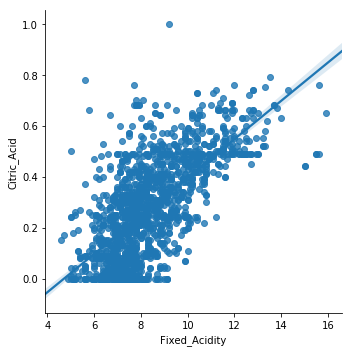

In [197]:
#test for linear relationship
g = sns.lmplot(x="Fixed_Acidity", y="Citric_Acid", data=data)

In [198]:
#test intial R2 score
regr = linear_model.LinearRegression()
X = data['Fixed_Acidity'].values.reshape(-1, 1)
Y = data['Citric_Acid']
regr.fit(X, Y)

print('Coefficients: \n', regr.coef_)
print('Intercept: \n', regr.intercept_)
print('\nR-squared:', regr.score(X, Y))

Coefficients: 
 [ 0.07515299]
Intercept: 
 -0.354270001819

R-squared: 0.451185504274


<function matplotlib.pyplot.show>

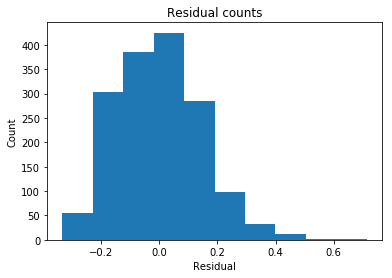

In [199]:
#residual count
predicted = regr.predict(X).ravel()
actual = Y
residual = actual - predicted
plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show

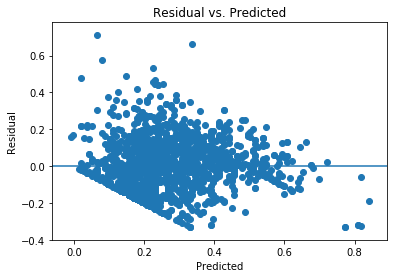

In [200]:
#residual plot
plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

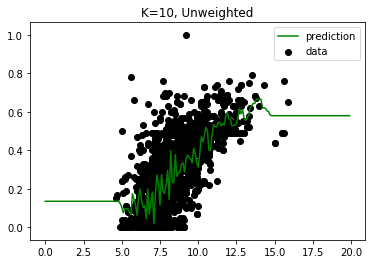

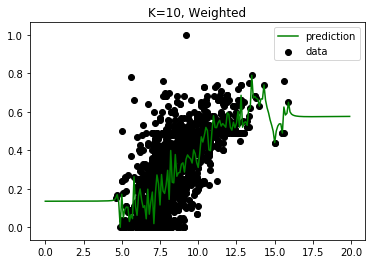

In [201]:
#now for the knn regression with 10 neighbors in both a weighted and unweighted environment
knn = neighbors.KNeighborsRegressor(n_neighbors=10)
X = pd.DataFrame(X)
knn.fit(X, Y)

T = np.arange(0, 20, 0.1)[:, np.newaxis]

Y_ = knn.predict(T)

plt.scatter(X, Y, c='k', label='data')
plt.plot(T, Y_, c='g', label='prediction')
plt.legend()
plt.title('K=10, Unweighted')
plt.show()


knn_w = neighbors.KNeighborsRegressor(n_neighbors=10, weights='distance')
X = pd.DataFrame(X)
knn_w.fit(X, Y)

T = np.arange(0, 20, 0.1)[:, np.newaxis]

Y_ = knn_w.predict(T)

plt.scatter(X, Y, c='k', label='data')
plt.plot(T, Y_, c='g', label='prediction')
plt.legend()
plt.title('K=10, Weighted')
plt.show()

In [202]:
#their scores and accuracy
score = cross_val_score(knn, X, Y, cv=5)
print("Unweighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))
score_w = cross_val_score(knn_w, X, Y, cv=5)
print("Weighted Accuracy: %0.2f (+/- %0.2f)" % (score_w.mean(), score_w.std() * 2))

Unweighted Accuracy: 0.28 (+/- 0.21)
Weighted Accuracy: 0.27 (+/- 0.22)


In [203]:
#now with a baseline lets split the group to see if we can get identical results with different groupings
X = data['Fixed_Acidity']
y = data['Citric_Acid']
xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.25)

In [204]:
X = xtrain.values.reshape(-1, 1)
Y = ytrain
regr.fit(X, Y)

print('Coefficients: \n', regr.coef_)
print('Intercept: \n', regr.intercept_)
print('\nR-squared:', regr.score(X, Y))

Coefficients: 
 [ 0.07715849]
Intercept: 
 -0.370286889592

R-squared: 0.457971010232


In [205]:
X = xtest.values.reshape(-1, 1)
Y = ytest
regr.fit(X, Y)

print('Coefficients: \n', regr.coef_)
print('Intercept: \n', regr.intercept_)
print('\nR-squared:', regr.score(X, Y))

Coefficients: 
 [ 0.0701373]
Intercept: 
 -0.313995482064

R-squared: 0.434417514142


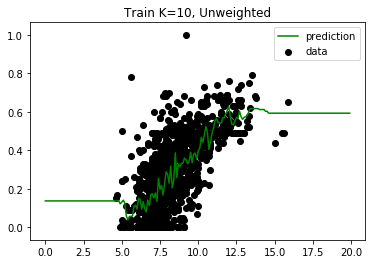

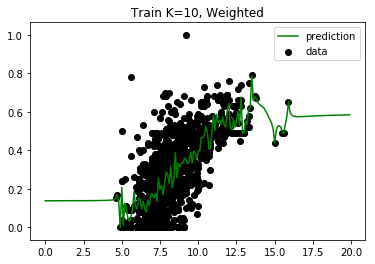

Unweighted Accuracy: 0.43 (+/- 0.04)
Weighted Accuracy: 0.41 (+/- 0.04)


In [206]:
#both train and test are very close to the original
X = xtrain.values.reshape(-1, 1)
Y = ytrain
knn = neighbors.KNeighborsRegressor(n_neighbors=10)
X = pd.DataFrame(X)
knn.fit(X, Y)

T = np.arange(0, 20, 0.1)[:, np.newaxis]

Y_ = knn.predict(T)

plt.scatter(X, Y, c='k', label='data')
plt.plot(T, Y_, c='g', label='prediction')
plt.legend()
plt.title('Train K=10, Unweighted')
plt.show()


knn_w = neighbors.KNeighborsRegressor(n_neighbors=10, weights='distance')
X = pd.DataFrame(X)
knn_w.fit(X, Y)

T = np.arange(0, 20, 0.1)[:, np.newaxis]

Y_ = knn_w.predict(T)

plt.scatter(X, Y, c='k', label='data')
plt.plot(T, Y_, c='g', label='prediction')
plt.legend()
plt.title('Train K=10, Weighted')
plt.show()

score = cross_val_score(knn, X, Y, cv=5)
print("Unweighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))
score_w = cross_val_score(knn_w, X, Y, cv=5)
print("Weighted Accuracy: %0.2f (+/- %0.2f)" % (score_w.mean(), score_w.std() * 2))

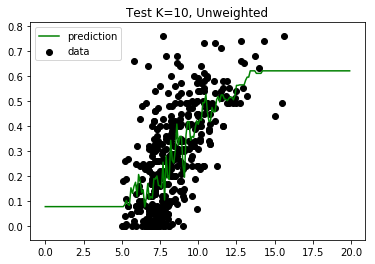

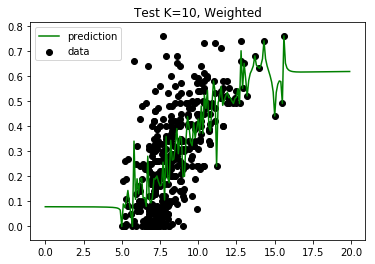

Unweighted Accuracy: 0.42 (+/- 0.17)
Weighted Accuracy: 0.34 (+/- 0.17)


In [207]:
X = xtest.values.reshape(-1, 1)
Y = ytest
knn = neighbors.KNeighborsRegressor(n_neighbors=10)
X = pd.DataFrame(X)
knn.fit(X, Y)

T = np.arange(0, 20, 0.1)[:, np.newaxis]

Y_ = knn.predict(T)

plt.scatter(X, Y, c='k', label='data')
plt.plot(T, Y_, c='g', label='prediction')
plt.legend()
plt.title('Test K=10, Unweighted')
plt.show()


knn_w = neighbors.KNeighborsRegressor(n_neighbors=10, weights='distance')
X = pd.DataFrame(X)
knn_w.fit(X, Y)

T = np.arange(0, 20, 0.1)[:, np.newaxis]

Y_ = knn_w.predict(T)

plt.scatter(X, Y, c='k', label='data')
plt.plot(T, Y_, c='g', label='prediction')
plt.legend()
plt.title('Test K=10, Weighted')
plt.show()

score = cross_val_score(knn, X, Y, cv=5)
print("Unweighted Accuracy: %0.2f (+/- %0.2f)" % (score.mean(), score.std() * 2))
score_w = cross_val_score(knn_w, X, Y, cv=5)
print("Weighted Accuracy: %0.2f (+/- %0.2f)" % (score_w.mean(), score_w.std() * 2))

In [208]:
#as predicted knn is similar unweighted and very different weighted. this makes sense because weighted is very prone to overfitting to specific data sets
#we notcies an issues with the residual from the original OLS so we are going to get rid os the outlier residuals above .3 and rerun the codes
newdata = pd.DataFrame()
newdata['Fixed_Acidity'] = data['Fixed_Acidity']
newdata['Citric_Acid'] = data['Citric_Acid']
newdata['Residual'] = newdata['Citric_Acid'] - regr.predict(newdata['Fixed_Acidity'].values.reshape(-1, 1)).ravel()
newdata = newdata[(newdata['Residual'] >= -.3) & (newdata['Residual'] <= .3)]

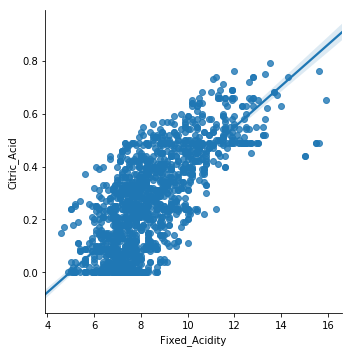

In [209]:
g = sns.lmplot(x="Fixed_Acidity", y="Citric_Acid", data=newdata)

In [210]:
regr = linear_model.LinearRegression()
X = newdata['Fixed_Acidity'].values.reshape(-1, 1)
Y = newdata['Citric_Acid']
regr.fit(X, Y)

print('Coefficients: \n', regr.coef_)
print('Intercept: \n', regr.intercept_)
print('\nR-squared:', regr.score(X, Y))

Coefficients: 
 [ 0.07807417]
Intercept: 
 -0.38809027626

R-squared: 0.534147658792


<function matplotlib.pyplot.show>

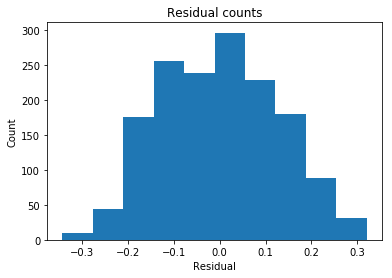

In [211]:
predicted = regr.predict(X).ravel()
actual = Y
residual = actual - predicted
plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show

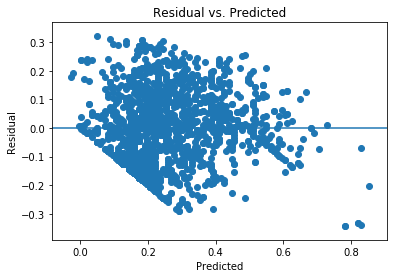

In [212]:
plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()

In [213]:
X = xtrain.reshape(-1, 1)
Y = ytrain
regr.fit(X, Y)

print('Coefficients: \n', regr.coef_)
print('Intercept: \n', regr.intercept_)
print('\nR-squared:', regr.score(X, Y))

Coefficients: 
 [ 0.07715849]
Intercept: 
 -0.370286889592

R-squared: 0.457971010232


c:\users\jmfra\appdata\local\programs\python\python36-32\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """Entry point for launching an IPython kernel.


In [214]:
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.25)
X = xtest.reshape(-1, 1)
Y = ytest
regr.fit(X, Y)

print('Coefficients: \n', regr.coef_)
print('Intercept: \n', regr.intercept_)
print('\nR-squared:', regr.score(X, Y))

Coefficients: 
 [ 0.07862006]
Intercept: 
 -0.37663113882

R-squared: 0.453083099321


In [216]:
#as you can see from the new data, the scores did improve after this, but not by much 

Looking at the data, you can see that OLS outperformed KNN in all cases, but only by a few points; and both models are really bad for the data that I chose. If you look at the residual plots you can see that there is a reoccuring issue that is unfixable becasue there are so many 0 values at the bottom of the set and the rest of the data looks to have an almost perfect randomness. Removing 0 values for citric acid is very likley to vastly improve the model, however that would throw out a huge portion of the data and would cause too much skew in a realistic set. 

In terms of the actual regression types, linear regression is likely the best to be used when the data is a hand selected sample from a population that consists of a group an even distibution of points over one of the variables. The data does not necessarily have to be hand picked but it is important that one variable has an even distribution. Without doing this, there is almost always skewness in data that either causes an issue in linearity, residuals, or covariability. 

KNN regression is better used on data types with high skewness but clear outcomes. As you can see form the graphs, the KNN does jump a lot more inbetween points, meaning it is much better at predicting oscillations in data instead of going for a straight line. The issue is that KNN with high N neighbors will never predict outliers and when it is low, it will overfit to specific data, so you will need to try out different values based on your data and sample size.